In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [4]:
covid_img = cv2.imread('covid_19.jpeg',cv2.IMREAD_GRAYSCALE)

In [5]:
covid_img.shape

(300, 400)

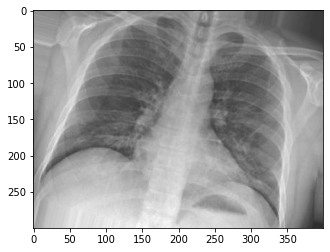

In [7]:
plt.imshow(cv2.cvtColor(covid_img,cv2.COLOR_BGR2RGB))

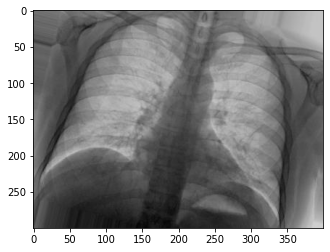

In [9]:
complement_covid_img = 255 - covid_img
plt.imshow(cv2.cvtColor(complement_covid_img,cv2.COLOR_BGR2RGB))

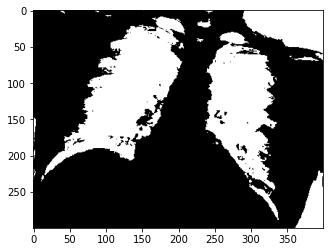

In [68]:
threshold_value = 130
ret, cthresholded_image = cv2.threshold(complement_covid_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(cthresholded_image,cmap="gray")

In [111]:
b1 = np.zeros((2,2),dtype='uint8')

# Create a 12x12 array with boundaries as zeros and the middle 10x10 as ones
b2 = np.zeros((4,4),dtype='uint8')
b2[1:-1, 1:-1] = (b1+1)*255


In [112]:
b2

array([[  0,   0,   0,   0],
       [  0, 255, 255,   0],
       [  0, 255, 255,   0],
       [  0,   0,   0,   0]], dtype=uint8)

In [113]:
# Erode the image with the structuring elements
tb1 = cv2.erode(cthresholded_image, b1)
tb2 = cv2.erode(~cthresholded_image, b2)

# Perform hit-or-miss transform
hit_or_miss = tb1 & tb2

In [114]:
y, x = np.where(hit_or_miss == 255)

# Print the coordinates
print("Coordinates where hit_or_miss is 1:")
for i in range(len(x)):
    print(f"({x[i]}, {y[i]})")

Coordinates where hit_or_miss is 1:
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
(21, 0)
(22, 0)
(23, 0)
(24, 0)
(25, 0)
(26, 0)
(27, 0)
(28, 0)
(29, 0)
(30, 0)
(31, 0)
(32, 0)
(33, 0)
(34, 0)
(35, 0)
(36, 0)
(43, 0)
(44, 0)
(45, 0)
(46, 0)
(47, 0)
(48, 0)
(49, 0)
(50, 0)
(51, 0)
(52, 0)
(53, 0)
(54, 0)
(55, 0)
(56, 0)
(57, 0)
(58, 0)
(59, 0)
(60, 0)
(61, 0)
(62, 0)
(63, 0)
(64, 0)
(65, 0)
(66, 0)
(67, 0)
(68, 0)
(69, 0)
(70, 0)
(71, 0)
(72, 0)
(73, 0)
(74, 0)
(75, 0)
(76, 0)
(77, 0)
(78, 0)
(79, 0)
(80, 0)
(81, 0)
(82, 0)
(83, 0)
(84, 0)
(85, 0)
(90, 0)
(91, 0)
(92, 0)
(93, 0)
(94, 0)
(95, 0)
(96, 0)
(97, 0)
(98, 0)
(99, 0)
(100, 0)
(101, 0)
(102, 0)
(103, 0)
(104, 0)
(105, 0)
(106, 0)
(107, 0)
(108, 0)
(109, 0)
(110, 0)
(111, 0)
(112, 0)
(113, 0)
(114, 0)
(115, 0)
(116, 0)
(117, 0)
(118, 0)
(119, 0)
(120, 0)
(121, 0)
(122, 0)
(123, 0)
(124, 0)
(125, 0)
(126, 0)
(127, 0)
(1

In [115]:
tb1

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ..., 255, 255, 255],
       ...,
       [255,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [116]:
tb2

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [117]:
hit_or_miss

array([[255, 255, 255, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

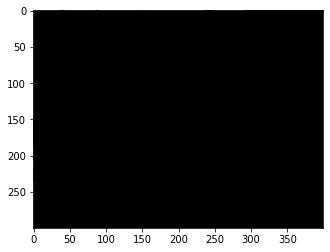

In [118]:
plt.imshow(hit_or_miss,cmap="gray")